# **Microsoft Movie Proposal**

    Author: Jason Hart

## Introduction:
The purpose of this research is to determine the ideal release month, genre and production budget to maximize profit dollars and ROI.  We will compare the effect of Genre, production budget and release month the ROI and raw profit of movie releases since 1975.  This data will allow us to determine what type of movie we should release, how much we should spend producing it and what month we should release themovie in.

## How we are going to determine how much to spend, what type of movie to make and when to release it:
    Utilizating the information from the movie data sets and data bases, we will compare the movievs based on 
    their raw profit dollars and their ROI.


In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
import datetime

# Data Cleaning

We are bringing in all the data for review and set the tables so that we can 
visualize the data in terms of profit and ROI

In [2]:
movie_budgets_tn = (
    pd.read_csv
    ('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/tn.movie_budgets.csv',
     header = 1)
)

In [3]:
movie_budgets_bom = (
    pd.read_csv
    ('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/bom.movie_gross.csv',
    header = 1)
               )    

In [4]:
tmb_movies = (
    pd.read_csv
    ('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/tmdb.movies.csv',
     header = 1)
)

In [5]:
rt_reviews = (
    pd.read_csv
    ('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/rt.reviews.csv',
     header = 1)
)

In [6]:
db_conn = (
    sqlite3.connect
    ('/Users/jasonhart/Desktop/flatiron/Phase_1/project_folder/im.db')
)

In [7]:
cur = db_conn.cursor()

In [8]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")


Data brought into the notebook and begining the data cleaning process

In [9]:
movie_budgets_tn.sort_values('release_date')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5559,60,"Apr 1, 1975",Death Race 2000,"$300,000.00",$0.00,$0.00
5520,21,"Apr 1, 1986",My Beautiful Laundrette,"$400,000.00",$0.00,$0.00
2260,61,"Apr 1, 1988","Bright Lights, Big City","$25,000,000.00","$16,118,077.00","$16,118,077.00"
5769,70,"Apr 1, 1996",Bang,"$10,000.00",$527.00,$527.00
1408,9,"Apr 1, 2005",Sin City,"$40,000,000.00","$74,103,820.00","$158,527,918.00"
...,...,...,...,...,...,...
849,50,"Sep 9, 2016",Sully,"$60,000,000.00","$125,070,033.00","$238,524,556.00"
3287,88,"Sep 9, 2016",Robinson Crusoe,"$13,000,000.00","$8,005,586.00","$42,446,455.00"
3712,13,"Sep 9, 2016",Kicks,"$10,000,000.00","$150,191.00","$150,191.00"
3129,30,"Sep 9, 2016",The Disappointments Room,"$15,000,000.00","$2,423,467.00","$3,503,761.00"


Taking the monetary data from object type to a numerical type

In [10]:
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
movie_budgets_tn[cols] = (
    movie_budgets_tn[cols].apply(lambda x :x.str.replace('$',"")
        .str.replace(",",'').astype(float))
)

/var/folders/cp/0jhbh9k954525pdl5rw436r00000gn/T/ipykernel_61655/937607267.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets_tn[cols].apply(lambda x :x.str.replace('$',"")


In [11]:
movie_budgets_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Setting index = movie title

In [12]:
movie_budgets_tn = movie_budgets_tn.set_index('movie').drop('id', axis = 1)

In [13]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09


Utilizing the title as the index

In [14]:
movie_budgets_bom.set_index('title', inplace = True)

In [15]:
movie_budgets_bom.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


Creating a profit and ROI column to perform comparison

In [16]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09


In [17]:
movie_budgets_tn['profit']=(
    (movie_budgets_tn['worldwide_gross']+movie_budgets_tn['domestic_gross'])
    -movie_budgets_tn['production_budget']
)

In [18]:
movie_budgets_tn.sort_values('profit', ascending = False)

,release_date,production_budget,domestic_gross,worldwide_gross,profit
movie,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09
Star Wars Ep. VII: The Force Awakens,"Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09
Titanic,"Dec 19, 1997",200000000.0,659363944.0,2.208208e+09,2.667572e+09
Avengers: Infinity War,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09
Jurassic World,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...
Army of the Dead,"Dec 31, 2019",90000000.0,0.0,0.000000e+00,-9.000000e+07
Bright,"Dec 13, 2017",90000000.0,0.0,0.000000e+00,-9.000000e+07
Men in Black: International,"Jun 14, 2019",110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [19]:
movie_budgets_tn['roi']=(
    movie_budgets_tn['profit']/movie_budgets_tn['production_budget']
)
movie_budgets_tn

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105
...,...,...,...,...,...,...
Red 11,"Dec 31, 2018",7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000
Following,"Apr 2, 1999",6000.0,48482.0,2.404950e+05,2.829770e+05,47.162833
Return to the Land of Wonders,"Jul 13, 2005",5000.0,1338.0,1.338000e+03,-2.324000e+03,-0.464800


Restricting the data to the Q1-Q3 interquartile range, because microsoft will not release a low budget film,\
but also will not be releasing a high budget film as their first film

In [20]:
movie_budgets_tn.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,1.017730e+08,6.783702
std,4.181208e+07,6.824060e+07,1.747200e+08,2.108880e+08,54.922090
min,1.100000e+03,0.000000e+00,0.000000e+00,-1.574753e+08,-1.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,-3.098222e+05,-0.202878
50%,1.700000e+07,1.722594e+07,2.798445e+07,2.499538e+07,1.659315
75%,4.000000e+07,5.234866e+07,9.764584e+07,1.111648e+08,4.893170
max,4.250000e+08,9.366622e+08,2.776345e+09,3.111853e+09,3599.000000


In [21]:
pb_q1 = movie_budgets_tn['production_budget'].quantile(0.25)
pb_q3 = movie_budgets_tn['production_budget'].quantile(0.75)
pb_q3


40000000.0

In [22]:
movie_budgets_filtered_iqr =(
    movie_budgets_tn.query('@pb_q1 <= production_budget <= @pb_q3')
)

In [23]:
movie_budgets_filtered_iqr.sort_values('production_budget')

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Running Forever,"Oct 27, 2015",5000000.0,0.0,0.0,-5000000.0,-1.000000
Nighthawks,"Apr 10, 1981",5000000.0,14600000.0,19600000.0,29200000.0,5.840000
Eve's Bayou,"Nov 7, 1997",5000000.0,14843425.0,14843425.0,24686850.0,4.937370
The Egyptian,"Aug 24, 1954",5000000.0,15000000.0,15000000.0,25000000.0,5.000000
Halloween: The Curse of Michael Myers,"Sep 29, 1995",5000000.0,15126948.0,15126948.0,25253896.0,5.050779
...,...,...,...,...,...,...
The Other Boleyn Girl,"Feb 29, 2008",40000000.0,26814957.0,78269970.0,65084927.0,1.627123
Resident Evil: The Final Chapter,"Jan 27, 2017",40000000.0,26844692.0,314101190.0,300945882.0,7.523647
The Musketeer,"Sep 7, 2001",40000000.0,27053815.0,27053815.0,14107630.0,0.352691


In [24]:
movie_budgets_filtered_iqr.drop('release_date', axis = 1)

,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,
The Sixth Sense,40000000.0,293506292.0,672806292.0,926312584.0,23.157815
Wedding Crashers,40000000.0,209218368.0,283218368.0,452436736.0,11.310918
The Karate Kid,40000000.0,176591618.0,351774938.0,488366556.0,12.209164
Fifty Shades of Grey,40000000.0,166167230.0,570998101.0,697165331.0,17.429133
The Proposal,40000000.0,163958031.0,314709717.0,438667748.0,10.966694
...,...,...,...,...,...
Should've Been Romeo,5000000.0,0.0,0.0,-5000000.0,-1.000000
Aztec Warrior,5000000.0,0.0,0.0,-5000000.0,-1.000000
Navy SEAL vs. Zombies,5000000.0,0.0,0.0,-5000000.0,-1.000000


In [25]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [26]:
movie_budgets_bom['foreign_gross'] = (
    movie_budgets_bom['foreign_gross']
    .str.replace(',','').astype(float)
)
movie_budgets_bom

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [27]:
movie_budgets_bom.replace(np.nan, 0, inplace = True)

In [28]:
movie_budgets_bom.sort_values('year')


,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Flipped,WB,1800000.0,0.0,2010
Cairo Time,IFC,1600000.0,391000.0,2010
After.Life,Anch.,109000.0,1900000.0,2010
Golmaal 3,Eros,1100000.0,935000.0,2010
...,...,...,...,...
Mary Queen of Scots,Focus,16500000.0,29900000.0,2018
Tyler Perry's Acrimony,LGF,43500000.0,2900000.0,2018
Uncle Drew,LG/S,42500000.0,4200000.0,2018


In [29]:
movie_budgets_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [30]:
movie_budgets_bom['total_gross']=movie_budgets_bom['domestic_gross']\
+movie_budgets_bom['foreign_gross']

In [31]:
movie_budgets_bom.sort_values('title')

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
'71,RAtt.,1300000.0,355000.0,2015,1.655000e+06
"1,000 Times Good Night",FM,53900.0,0.0,2014,5.390000e+04
10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016,1.102000e+08
10 Years,Anch.,203000.0,0.0,2012,2.030000e+05
1001 Grams,KL,11000.0,0.0,2015,1.100000e+04
...,...,...,...,...,...
Zoolander 2,Par.,28800000.0,27900000.0,2016,5.670000e+07
Zootopia,BV,341300000.0,682500000.0,2016,1.023800e+09
[Rec] 2,Magn.,27800.0,18500000.0,2010,1.852780e+07


Organizing the review data sets, so that they can be merged with profit data sets

In [32]:
tmb_movies.sort_values('vote_average', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,13258,[99],403294,en,9/11: Simulations,0.600,2014-07-04,9/11: Simulations,10.0,1
22787,22787,"[27, 35]",444170,en,Lasagna Cat - Telephone Sex Survey Results,0.722,2017-02-23,Lasagna Cat - Telephone Sex Survey Results,10.0,1
22592,22592,[99],488357,en,MOTO 9: The Movie,0.900,2017-11-21,MOTO 9: The Movie,10.0,1
22607,22607,[],437448,en,The Letter Carrier,0.895,2017-01-27,The Letter Carrier,10.0,1
22610,22610,"[9648, 37, 18, 10402]",463601,en,Hope This Goes Over Well/Living in an Empty World,0.894,2017-06-26,Hope This Goes Over Well/Living in an Empty World,10.0,1
...,...,...,...,...,...,...,...,...,...,...
11018,11018,[],124727,en,Darkchylde,0.600,2013-08-09,Darkchylde,0.0,1
14168,14168,[],167531,en,Summer Snow,0.600,2014-07-25,Summer Snow,0.0,1
14167,14167,"[99, 10402]",221918,en,Butch Walker: Out of Focus,0.600,2014-08-05,Butch Walker: Out of Focus,0.0,1
20601,20601,"[18, 35]",448105,en,The Angry Man,0.600,2017-04-08,The Angry Man,0.0,1


In [33]:
movie_budgets_tn.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
Avatar,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,7.322007
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,8.761278e+08,2.133774
Dark Phoenix,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-1.574753e+08,-0.449929
Avengers: Age of Ultron,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,1.531420e+09,4.632244
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,5.110105


In [34]:
tmb_movies.set_index('title', inplace= True)
tmb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186


In [35]:
movie_budgets_w_review = (
    movie_budgets_filtered_iqr.merge(tmb_movies,
    left_index= True, right_index= True)
)

In [36]:
movie_budgets_w_review.head()

,release_date_x,production_budget,domestic_gross,worldwide_gross,profit,roi,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
10 Cloverfield Lane,"Mar 11, 2016",5000000.0,72082999.0,108286422.0,175369421.0,35.073884,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629
10 Days in a Madhouse,"Nov 11, 2015",12000000.0,14616.0,14616.0,-11970768.0,-0.997564,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7
12 Strong,"Jan 19, 2018",35000000.0,45819713.0,71118378.0,81938091.0,2.341088,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312
12 Years a Slave,"Oct 18, 2013",20000000.0,56671993.0,181025343.0,217697336.0,10.884867,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631
127 Hours,"Nov 5, 2010",18000000.0,18335230.0,60217171.0,60552401.0,3.364022,93,"[12, 18, 53]",44115,en,127 Hours,11.435,2010-11-05,7.0,4469


In [37]:
movie_budgets_w_review = (
    movie_budgets_w_review
    [['profit', 'roi', 'production_budget', 'vote_average', 'release_date_x']]
)
movie_budgets_w_review.head()

,profit,roi,production_budget,vote_average,release_date_x
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015"
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013"
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010"


In [38]:
movie_budgets_w_review.head()


,profit,roi,production_budget,vote_average,release_date_x
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015"
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013"
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010"


In [39]:
#avg_rating = pd.read_sql("""SELECT * FROM movie_ratings;""", db_conn)

In [40]:
#avg_rating

In [41]:
avg_rating_genre=pd.read_sql("""
SELECT r.averagerating, primary_title, genres
FROM movie_ratings r
JOIN movie_basics b
    ON r.movie_id = b.movie_id;""", db_conn)

In [42]:
avg_rating_genre.set_index('primary_title', inplace= True)

In [43]:
avg_rating_genre.head()

,averagerating,genres
primary_title,,
Laiye Je Yaarian,8.3,Romance
Borderless,8.9,Documentary
Just Inès,6.4,Drama
The Legend of Hercules,4.2,"Action,Adventure,Fantasy"
Até Onde?,6.5,"Mystery,Thriller"


Creating a budget grouping of data to make visualization and comparison possible

In [44]:
movie_budgets_w_review['production_budget'].round(decimals = -6)


10 Cloverfield Lane       5000000.0
10 Days in a Madhouse    12000000.0
12 Strong                35000000.0
12 Years a Slave         20000000.0
127 Hours                18000000.0
                            ...    
Youth                    13000000.0
Youth                    13000000.0
Zambezia                 20000000.0
Zoom                     35000000.0
mother!                  30000000.0
Name: production_budget, Length: 1189, dtype: float64

In [45]:
movie_budgets_w_review['budget_group'] = movie_budgets_w_review\
['production_budget'].map(lambda x : x/1000000)

In [46]:
def round_5(x, base = 5):
    return int(base * round(x/base))

In [47]:
movie_budgets_w_review['budget_group'] = movie_budgets_w_review['budget_group'].apply(lambda x : round_5(x))

In [48]:
movie_budgets_w_review.head()

,profit,roi,production_budget,vote_average,release_date_x,budget_group
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013",20
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010",20


In [49]:
movie_budgets_w_review['budget_group']

10 Cloverfield Lane       5
10 Days in a Madhouse    10
12 Strong                35
12 Years a Slave         20
127 Hours                20
                         ..
Youth                    15
Youth                    15
Zambezia                 20
Zoom                     35
mother!                  30
Name: budget_group, Length: 1189, dtype: int64

In [50]:
movie_budgets_w_review.reset_index(inplace = True)

In [51]:
movie_budgets_w_review.rename(columns= {'index': 'movie'}, inplace = True)

In [52]:

movie_budgets_w_review.head()

,movie,profit,roi,production_budget,vote_average,release_date_x,budget_group
0,10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5
1,10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10
2,12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35
3,12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013",20
4,127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010",20


In [53]:
budget_group = movie_budgets_w_review.groupby(['budget_group']).agg('mean')
budget_group.head()

,profit,roi,production_budget,vote_average
budget_group,,,,
5,4.703846e+07,8.841384,5.728869e+06,6.138095
10,4.648407e+07,4.548705,1.008074e+07,6.355926
15,5.908965e+07,4.044592,1.469524e+07,6.288435
20,8.155366e+07,4.097472,1.976474e+07,6.180000
25,5.779423e+07,2.330625,2.492960e+07,6.313600


In [54]:
movie_budgets_pivot= movie_budgets_w_review.pivot_table(index = 'budget_group',\
values = ('profit', 'roi'), aggfunc= 'mean')

In [55]:
movie_budgets_pivot.sort_values('profit')

,profit,roi
budget_group,,
10,4.648407e+07,4.548705
5,4.703846e+07,8.841384
25,5.779423e+07,2.330625
15,5.908965e+07,4.044592
20,8.155366e+07,4.097472
30,9.543494e+07,3.209804
35,1.025647e+08,2.912725
40,1.270217e+08,3.205784


In [56]:
movie_budgets_pivot

,profit,roi
budget_group,,
5,4.703846e+07,8.841384
10,4.648407e+07,4.548705
15,5.908965e+07,4.044592
20,8.155366e+07,4.097472
25,5.779423e+07,2.330625
30,9.543494e+07,3.209804
35,1.025647e+08,2.912725
40,1.270217e+08,3.205784


In [57]:
avg_rating_genre

,averagerating,genres
primary_title,,
Laiye Je Yaarian,8.3,Romance
Borderless,8.9,Documentary
Just Inès,6.4,Drama
The Legend of Hercules,4.2,"Action,Adventure,Fantasy"
Até Onde?,6.5,"Mystery,Thriller"
...,...,...
Caisa,8.1,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,7.5,"Action,Animation,Sci-Fi"
Sisters,4.7,"Action,Drama"


In [58]:
movie_budgets_w_review = movie_budgets_w_review.set_index('movie')

In [59]:
movie_rating_review = movie_budgets_w_review.merge(avg_rating_genre,\
right_index= True, left_index= True)
movie_rating_review.head()

,profit,roi,production_budget,vote_average,release_date_x,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5,7.2,"Drama,Horror,Mystery"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10,6.7,Drama
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35,6.6,"Action,Drama,History"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013",20,8.1,"Biography,Drama,History"
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010",20,7.6,"Adventure,Biography,Drama"


In [60]:
movie_rating_review['genres'] = movie_rating_review['genres'].str.split(",")


In [61]:
movie_rating_review.head()

,profit,roi,production_budget,vote_average,release_date_x,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5,7.2,"[Drama, Horror, Mystery]"
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10,6.7,[Drama]
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35,6.6,"[Action, Drama, History]"
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013",20,8.1,"[Biography, Drama, History]"
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010",20,7.6,"[Adventure, Biography, Drama]"


In [62]:
movie_rating_review_exploded = movie_rating_review.explode("genres")
movie_rating_review_exploded.head()

,profit,roi,production_budget,vote_average,release_date_x,budget_group,averagerating,genres
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5,7.2,Drama
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5,7.2,Horror
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5,7.2,Mystery
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10,6.7,Drama
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35,6.6,Action


In [63]:
genre_pivot = pd.pivot_table(movie_rating_review_exploded, index = 'genres',\
values = ['profit', 'roi', 'budget_group'], aggfunc= 'mean')
genre_pivot.head()


,budget_group,profit,roi
genres,,,
Action,22.233677,6.069633e+07,4.240434
Adventure,22.213740,5.102604e+07,2.615027
Animation,17.682927,4.354921e+07,4.223576
Biography,19.401198,5.388147e+07,3.187390
Comedy,18.921114,7.026779e+07,4.503218


In [64]:
movie_budgets_w_review.head()

,profit,roi,production_budget,vote_average,release_date_x,budget_group
movie,,,,,,
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,6.9,"Mar 11, 2016",5
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,5.4,"Nov 11, 2015",10
12 Strong,81938091.0,2.341088,35000000.0,5.6,"Jan 19, 2018",35
12 Years a Slave,217697336.0,10.884867,20000000.0,7.9,"Oct 18, 2013",20
127 Hours,60552401.0,3.364022,18000000.0,7.0,"Nov 5, 2010",20


In [65]:
movie_budgets_w_review['release_date']=pd.to_datetime(movie_budgets_w_review\
['release_date_x'])

In [66]:
movie_budgets_w_review['release_month'] = movie_budgets_w_review\
['release_date'].dt.month

In [67]:
movie_budgets_w_review.drop('release_date_x', axis = 1, inplace=True)


In [68]:
movie_budget_vis = movie_budgets_w_review.drop('vote_average', axis = 1)

In [69]:
movie_budget_vis = movie_budget_vis.drop_duplicates()

In [70]:
movie_budget_vis.head()

,profit,roi,production_budget,budget_group,release_date,release_month
movie,,,,,,
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,5,2016-03-11,3
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,10,2015-11-11,11
12 Strong,81938091.0,2.341088,35000000.0,35,2018-01-19,1
12 Years a Slave,217697336.0,10.884867,20000000.0,20,2013-10-18,10
127 Hours,60552401.0,3.364022,18000000.0,20,2010-11-05,11


In [71]:
movie_budget_months = movie_budgets_w_review.pivot_table\
(index = 'release_month', values = ['roi', 'profit'], aggfunc= 'mean')

In [72]:
movie_budget_months.head()

,profit,roi
release_month,,
1,8.161076e+07,7.731025
2,7.150254e+07,5.435679
3,4.244249e+07,3.391571
4,5.697493e+07,2.736767
5,5.481040e+07,3.249346


In [73]:
budget_group['production_budget']

budget_group
5     5.728869e+06
10    1.008074e+07
15    1.469524e+07
20    1.976474e+07
25    2.492960e+07
30    2.985984e+07
35    3.505854e+07
40    3.953750e+07
Name: production_budget, dtype: float64

# Visualization

    Now that the data tables have been set to where they can be compared based
    on profit and ROI, we will begin the data visualization faze

In [74]:
movie_budgets_filtered_iqr.head()

,release_date,production_budget,domestic_gross,worldwide_gross,profit,roi
movie,,,,,,
The Sixth Sense,"Aug 6, 1999",40000000.0,293506292.0,672806292.0,926312584.0,23.157815
Wedding Crashers,"Jul 15, 2005",40000000.0,209218368.0,283218368.0,452436736.0,11.310918
The Karate Kid,"Jun 11, 2010",40000000.0,176591618.0,351774938.0,488366556.0,12.209164
Fifty Shades of Grey,"Feb 13, 2015",40000000.0,166167230.0,570998101.0,697165331.0,17.429133
The Proposal,"Jun 19, 2009",40000000.0,163958031.0,314709717.0,438667748.0,10.966694


<AxesSubplot:xlabel='production_budget', ylabel='roi'>

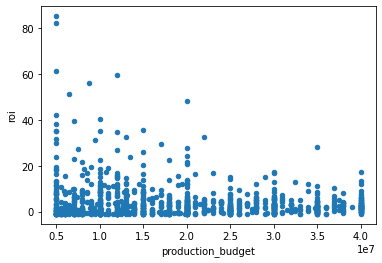

In [75]:
movie_budget_vis.plot.scatter(y = 'roi', x ='production_budget')

<AxesSubplot:xlabel='roi', ylabel='production_budget'>

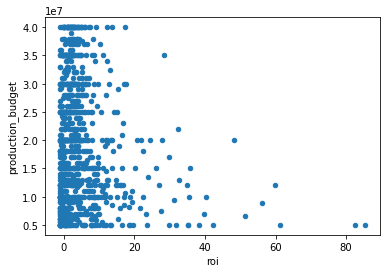

In [76]:
movie_budget_vis.plot.scatter(x = 'roi', y = 'production_budget')

In [77]:
budget_group.head()

,profit,roi,production_budget,vote_average
budget_group,,,,
5,4.703846e+07,8.841384,5.728869e+06,6.138095
10,4.648407e+07,4.548705,1.008074e+07,6.355926
15,5.908965e+07,4.044592,1.469524e+07,6.288435
20,8.155366e+07,4.097472,1.976474e+07,6.180000
25,5.779423e+07,2.330625,2.492960e+07,6.313600


Text(0, 0.5, 'Returned ROI')

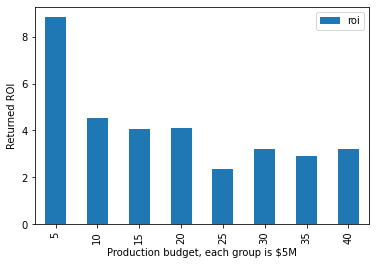

In [108]:
budget_group.plot.bar( y= 'roi')
plt.xlabel('Production budget, each group is $5M')
plt.ylabel('Returned ROI')

Text(0, 0.5, 'Profit in $100M')

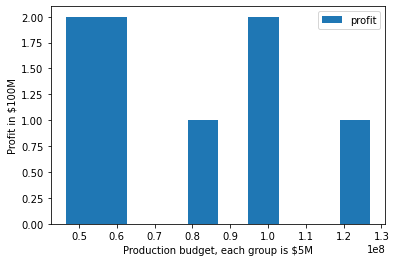

In [79]:
budget_group.plot.hist(y = 'profit')
plt.xlabel('Production budget, each group is $5M')
plt.ylabel('Profit in $100M')

In [80]:
movie_budgets_pivot.head()

,profit,roi
budget_group,,
5,4.703846e+07,8.841384
10,4.648407e+07,4.548705
15,5.908965e+07,4.044592
20,8.155366e+07,4.097472
25,5.779423e+07,2.330625


Text(0.5, 1.0, 'Production Budget & ROI')

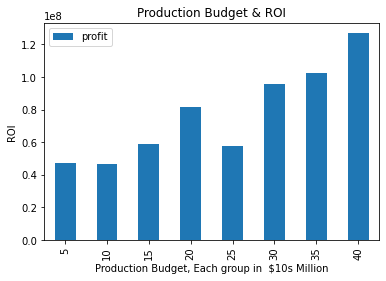

In [105]:
movie_budgets_pivot.plot.bar( y = 'profit')
plt.xlabel('Production Budget, Each group in  $10s Million')
plt.ylabel('ROI')
plt.title('Production Budget & ROI')

Text(0.5, 1.0, 'Production Budget & ROI')

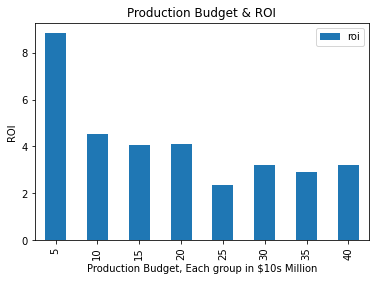

In [106]:
movie_budgets_pivot.plot.bar(y = 'roi')
plt.xlabel('Production Budget, Each group in $10s Million')
plt.ylabel('ROI')
plt.title('Production Budget & ROI')

<AxesSubplot:xlabel='budget_group', ylabel='profit'>

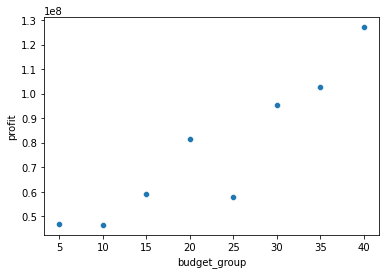

In [83]:
sns.scatterplot(data = movie_budgets_pivot, y = 'profit', x = 'budget_group')

In [84]:
genre_pivot.head()

,budget_group,profit,roi
genres,,,
Action,22.233677,6.069633e+07,4.240434
Adventure,22.213740,5.102604e+07,2.615027
Animation,17.682927,4.354921e+07,4.223576
Biography,19.401198,5.388147e+07,3.187390
Comedy,18.921114,7.026779e+07,4.503218


In [111]:
genre_pivot_sorted_profit = genre_pivot.sort_values('profit', ascending=False)
genre_pivot.head()

,budget_group,profit,roi
genres,,,
Musical,12.777778,3.443918e+08,17.805335
Fantasy,17.328767,1.555064e+08,11.192185
Family,18.880597,1.059813e+08,6.049510
Sport,17.211538,9.307353e+07,14.024284
Music,17.065217,8.280215e+07,4.781997


<AxesSubplot:ylabel='genres'>

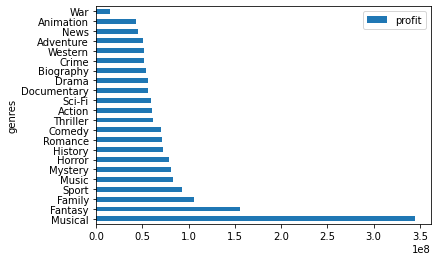

In [112]:
genre_pivot_sorted_profit.plot.barh( y = 'profit')

In [113]:
genre_pivot_sorted_roi= genre_pivot.sort_values('roi', ascending=False)
genre_pivot.head()

,budget_group,profit,roi
genres,,,
Musical,12.777778,3.443918e+08,17.805335
Fantasy,17.328767,1.555064e+08,11.192185
Family,18.880597,1.059813e+08,6.049510
Sport,17.211538,9.307353e+07,14.024284
Music,17.065217,8.280215e+07,4.781997


<AxesSubplot:ylabel='genres'>

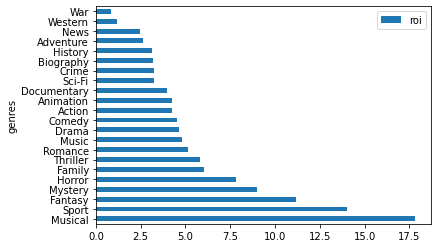

In [114]:
genre_pivot_sorted_roi.plot.barh(y='roi')

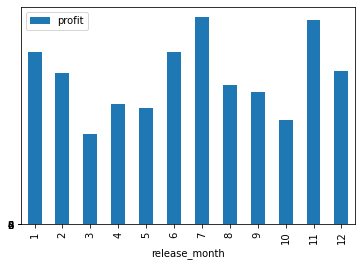

<Figure size 576x720 with 0 Axes>

In [96]:
movie_budget_months.plot.bar( y = 'profit')
plt.yticks(np.arange(0,10, step = 2))
plt.figure(figsize= (8,10))
plt.show()

In [97]:
movie_budget_months.head()

,profit,roi
release_month,,
1,8.161076e+07,7.731025
2,7.150254e+07,5.435679
3,4.244249e+07,3.391571
4,5.697493e+07,2.736767
5,5.481040e+07,3.249346


Text(0, 0.5, 'ROI of Movie')

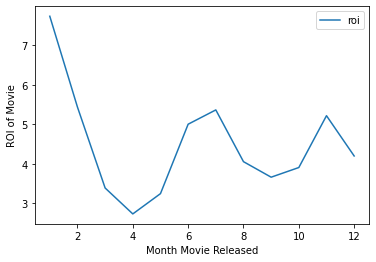

In [98]:
movie_budget_months.plot.line(y = 'roi')
plt.xlabel('Month Movie Released')
plt.ylabel('ROI of Movie')

Text(0, 0.5, 'Profit of Movie in $100 millions')

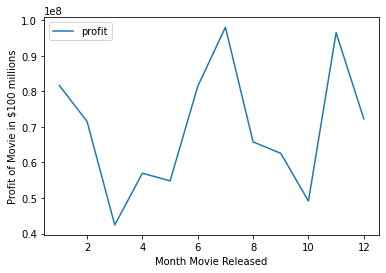

In [99]:
movie_budget_months.plot.line( y = 'profit')
plt.xlabel("Month Movie Released")
plt.ylabel('Profit of Movie in $100 millions')

In [100]:
movie_budget_vis.head()

,profit,roi,production_budget,budget_group,release_date,release_month
movie,,,,,,
10 Cloverfield Lane,175369421.0,35.073884,5000000.0,5,2016-03-11,3
10 Days in a Madhouse,-11970768.0,-0.997564,12000000.0,10,2015-11-11,11
12 Strong,81938091.0,2.341088,35000000.0,35,2018-01-19,1
12 Years a Slave,217697336.0,10.884867,20000000.0,20,2013-10-18,10
127 Hours,60552401.0,3.364022,18000000.0,20,2010-11-05,11


In [101]:
budget_group.head()

,profit,roi,production_budget,vote_average
budget_group,,,,
5,4.703846e+07,8.841384,5.728869e+06,6.138095
10,4.648407e+07,4.548705,1.008074e+07,6.355926
15,5.908965e+07,4.044592,1.469524e+07,6.288435
20,8.155366e+07,4.097472,1.976474e+07,6.180000
25,5.779423e+07,2.330625,2.492960e+07,6.313600


Text(0.5, 1.0, 'Release month Effect on ROI')

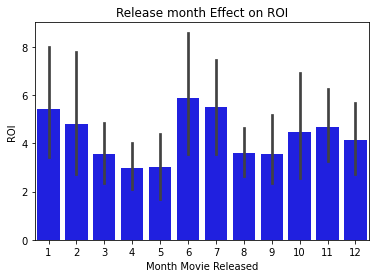

In [102]:
sns.barplot(data= movie_budget_vis, x= 'release_month', y = 'roi', color= 'blue')
plt.xlabel("Month Movie Released")
plt.ylabel('ROI')
plt.title('Release month Effect on ROI')

Text(0.5, 1.0, 'Release month Effect on Profit')

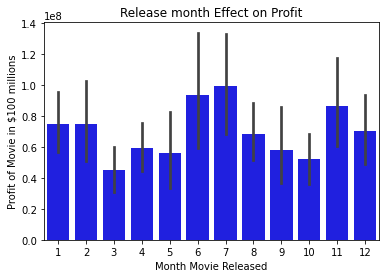

In [103]:
sns.barplot(data = movie_budget_vis,  x = 'release_month', y = 'profit', color = 'blue')
plt.xlabel("Month Movie Released")
plt.ylabel('Profit of Movie in $100 millions')
plt.title('Release month Effect on Profit')


In [ ]:
movie_budget_vis.head()

# Conclusion:
    In conclusion, the data shows that the the best movie to release as our first movie, if we want to maximize profit, would be a musical, released in June with a production budget of $30 milliion.  We could next dive into the idea of releasing a critically acclaimed movie, by looking at avg rating and reviews.  This would allow us to build momentum and give us a good lead into a second movie.